In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$limit=50000'
response = requests.get(endpoint)

In [3]:
response

<Response [200]>

In [4]:
result = response.json()
ndf = pd.DataFrame(result)

In [5]:
ndf

,month_name,year,query_count,query_text,month
0,January,2014,223,ebid,NaN
1,January,2014,112,property maps,NaN
2,January,2014,97,maps,NaN
3,January,2014,90,property tax,NaN
4,January,2014,76,jobs,NaN
...,...,...,...,...,...
43672,July,2021,8,sign ordinance,7
43673,July,2021,8,snap,7
43674,July,2021,8,small business,7
43675,July,2021,8,water department,7


In [6]:
result

[{'month_name': 'January',
  'year': '2014',
  'query_count': '223',
  'query_text': 'ebid'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '112',
  'query_text': 'property maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '97',
  'query_text': 'maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '90',
  'query_text': 'property tax'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '76',
  'query_text': 'jobs'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '75',
  'query_text': 'employment'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '73',
  'query_text': 'human resources'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '62',
  'query_text': 'police'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '61',
  'query_text': 'criminal court clerk'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '53',
  'query_text': 'media releases'},
 {'mon

Make an API request that returns the months where "fire" was searched in 2016. Which month had the most searches?

In [7]:
ndf[(ndf['query_text']== 'fire') & (ndf['year']=='2016')]

,month_name,year,query_count,query_text,month
12040,January,2016,19,fire,NaN
12938,February,2016,35,fire,NaN
13353,March,2016,32,fire,NaN
13636,April,2016,26,fire,NaN
14448,May,2016,24,fire,NaN
14950,June,2016,31,fire,NaN
15208,July,2016,24,fire,NaN
15748,August,2016,47,fire,NaN
15987,September,2016,36,fire,NaN
16765,October,2016,38,fire,NaN


In [8]:
ep3 = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$where=query_text=%27fire%27%20and%20year=2016'
res3 = requests.get(ep3)
res3

<Response [200]>

In [9]:
result3 = res3.json()
qydf = pd.DataFrame(result3)
qydf

,month_name,year,query_count,query_text
0,January,2016,19,fire
1,February,2016,35,fire
2,March,2016,32,fire
3,April,2016,26,fire
4,May,2016,24,fire
5,June,2016,31,fire
6,July,2016,24,fire
7,August,2016,47,fire
8,September,2016,36,fire
9,October,2016,38,fire


Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur?  

In [10]:
ep2 = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$where=query_count%20%3E%20%27100%27'
res2 = requests.get(ep2)
res2

<Response [200]>

In [11]:
results = res2.json()
qtdf = pd.DataFrame(results)
qtdf

,month_name,year,query_count,query_text,month
0,March,2014,101,permits,NaN
1,January,2015,101,criminal court clerk,NaN
2,September,2015,101,codes,NaN
3,March,2016,101,police,NaN
4,March,2016,101,civil service,NaN
...,...,...,...,...,...
995,January,2018,173,maps,NaN
996,July,2018,173,maps,NaN
997,August,2020,173,isupplier,8
998,March,2016,174,employment,NaN


In [12]:
ndf['query_count'] = ndf['query_count'].astype('Int64')

In [13]:
ndf[ndf['query_count'] > 100]

,month_name,year,query_count,query_text,month
0,January,2014,223,ebid,NaN
1,January,2014,112,property maps,NaN
501,February,2014,298,ebid,NaN
502,February,2014,185,property taxes,NaN
503,February,2014,140,maps,NaN
...,...,...,...,...,...
43193,July,2021,114,GIS,7
43194,July,2021,109,accident report,7
43195,July,2021,105,employment,7
43196,July,2021,103,trash pickup,7


Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur?  

In [14]:
ndf[(ndf['query_text']=='codes') & (ndf['query_count'] > 100)]

,month_name,year,query_count,query_text,month
8093,January,2017,115,codes,NaN
9879,August,2015,117,codes,NaN
10232,September,2015,101,codes,NaN
12593,February,2016,121,codes,NaN
13657,April,2016,111,codes,NaN
14362,May,2016,107,codes,NaN
15642,August,2016,104,codes,NaN
18453,February,2017,150,codes,NaN
18960,March,2017,158,codes,NaN
19117,April,2017,190,codes,NaN


In [15]:
ep = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$where=query_text=%27codes%27%20and%20query_count%20%3E%20%27100%27'
resp= requests.get(ep)
resp

<Response [200]>

In [16]:
nres = resp.json()
nres = pd.DataFrame(nres)
nres

,month_name,year,query_count,query_text,month
0,September,2015,101,codes,NaN
1,April,2021,102,codes,4
2,August,2016,104,codes,NaN
3,November,2020,104,codes,11
4,December,2017,106,codes,NaN
5,May,2016,107,codes,NaN
6,April,2016,111,codes,NaN
7,July,2021,114,codes,7
8,January,2017,115,codes,NaN
9,May,2021,115,codes,5


Make an API request that returns the entire Top 500 Monthly Searches dataset. Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

In [17]:
maps = ndf[ndf['query_text'] == 'maps']

In [18]:
maps = maps.reset_index()
maps

,index,month_name,year,query_count,query_text,month
0,2,January,2014,97,maps,NaN
1,503,February,2014,140,maps,NaN
2,1005,March,2014,144,maps,NaN
3,1503,April,2014,152,maps,NaN
4,2003,May,2014,119,maps,NaN
...,...,...,...,...,...,...
77,39196,November,2020,86,maps,11
78,39688,December,2020,113,maps,12
79,41188,March,2021,132,maps,3
80,41683,April,2021,148,maps,4


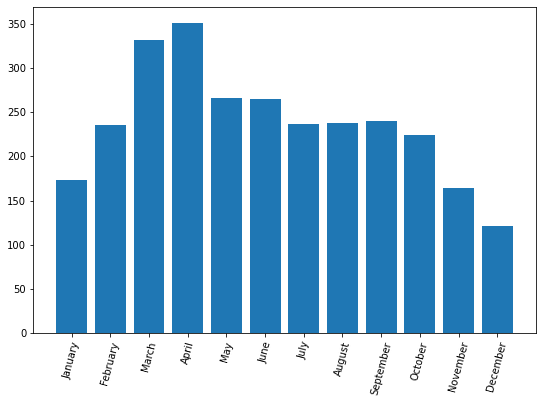

In [19]:
plt.figure(figsize=(9,6))
plt.bar('month_name', 'query_count', data = maps)
plt.xticks(rotation = 75);

In [25]:
ep4 = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$where=query_text=%27maps%27'
resp4 = requests.get(ep4)
resp4

<Response [200]>

In [26]:
res4 = resp4.json()
res4 = pd.DataFrame(res4)
res4

,month_name,year,query_count,query_text,month
0,January,2014,97,maps,NaN
1,February,2014,140,maps,NaN
2,March,2014,144,maps,NaN
3,April,2014,152,maps,NaN
4,May,2014,119,maps,NaN
...,...,...,...,...,...
77,November,2020,86,maps,11
78,December,2020,113,maps,12
79,March,2021,132,maps,3
80,April,2021,148,maps,4


<BarContainer object of 82 artists>

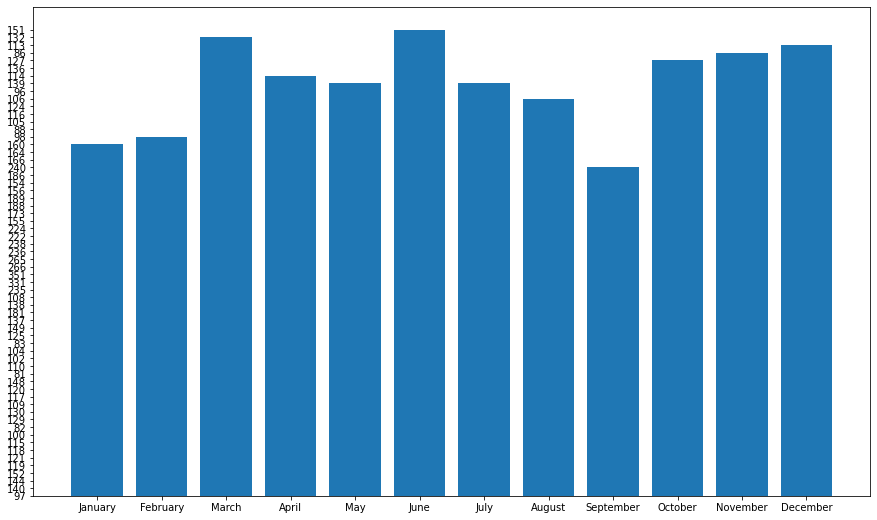

In [30]:
plt.figure(figsize=(15,9))
plt.bar('month_name', 'query_count', data = res4)


Make an API request to pull back all the data from [hubNashville (311) Service Requests](https://data.nashville.gov/Public-Services/hubNashville-311-Service-Requests/7qhx-rexh) (check to see how many rows you can return in a single request). Compare it to the Top 500 Monthly Searches data set. What do you observe? (This is open-ended, there isn't a specific answer for this one)  

In [20]:
endpoint2 = 'https://data.nashville.gov/resource/7qhx-rexh.json?$limit=985000'
response2 = requests.get(endpoint2)

In [21]:
response2

<Response [200]>

In [22]:
res = response2.json()
res = pd.DataFrame(res)
res

,case_number,status,case_request,case_subrequest,additional_subrequest,date_time_opened,date_time_closed,case_origin,state_issue,closed_when_created,...,:@computed_region_v67z_xm3t,:@computed_region_kh5x_g7w5,:@computed_region_cfa7_hbpz,:@computed_region_sjpq_96s8,:@computed_region_gisn_y5cm,:@computed_region_b9k3_hpc2,contact_type,parent_case,oem_id,preferred_language
0,170144,Closed,"Streets, Roads & Sidewalks",Overgrowth on right of way,Roadway,2019-04-16T15:54:00.000,2019-04-18T16:06:00.000,Phone,FALSE,FALSE,...,1,2,67,16168,6,1,NaN,NaN,NaN,NaN
1,161502,Closed,"Trash, Recycling & Litter",Missed Pickup - Recycle Cart Service,Recycle - Curbside/Alley Missed Pickup,2019-03-29T14:27:00.000,2019-04-03T21:29:00.000,hubNashville Community,FALSE,FALSE,...,6,12,628,15804,5,6,NaN,NaN,NaN,NaN
2,169037,Closed,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,2019-04-12T21:08:00.000,2019-04-12T21:08:00.000,Phone,FALSE,TRUE,...,5,14,2,15798,8,5,NaN,NaN,NaN,NaN
3,169463,Closed,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,2019-04-15T15:26:00.000,2019-04-15T15:26:00.000,Phone,FALSE,TRUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,160904,Closed,"Streets, Roads & Sidewalks",Request New Sign,Request New Sign,2019-03-28T15:30:00.000,2019-06-26T16:22:00.000,Phone,FALSE,FALSE,...,9,27,NaN,16166,3,9,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984957,158033,Closed,"Streets, Roads & Sidewalks",Remove debris in roadway,Remove debris in roadway,2019-03-22T13:00:00.000,2019-03-22T13:23:00.000,Phone,FALSE,FALSE,...,4,16,NaN,28805,3,4,NaN,NaN,OE-00008990_3/21/2019 13:20,NaN
984958,157812,Closed,"Trash, Recycling & Litter",Missed Pickup - Recycle Cart Service,Recycle - Curbside/Alley Missed Pickup,2019-03-21T18:48:00.000,2019-03-29T21:26:00.000,hubNashville Community,FALSE,FALSE,...,1,14,642,15798,8,1,Resident,NaN,NaN,NaN
984959,161133,Closed,"Trash, Recycling & Litter",Missed Pickup - Recycle Cart Service,Recycle - Curbside/Alley Missed Pickup,2019-03-28T19:11:00.000,2019-04-02T21:32:00.000,Phone,FALSE,FALSE,...,3,29,323,24062,7,3,NaN,NaN,NaN,NaN
984960,166973,Closed,"Trash, Recycling & Litter",Missed Pickup - Trash Cart Service,Trash - Curbside/Alley Missed Pickup,2019-04-10T12:04:00.000,2019-04-12T20:40:00.000,Phone,FALSE,FALSE,...,2,3,NaN,15550,2,2,NaN,NaN,NaN,NaN
